Visualise certain feature

In [61]:
#This program is to visualize some features of original dataset

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

#First to see our dataset
voice = pd.read_csv("voice.csv")
voice.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Check how many males and femelles  separately in our dataset

In [11]:
voice.label
voice["label"].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [4]:
#scatter plot of given features
#you can can compare others features just change the features name
sns.FacetGrid(voice, hue="label", size=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

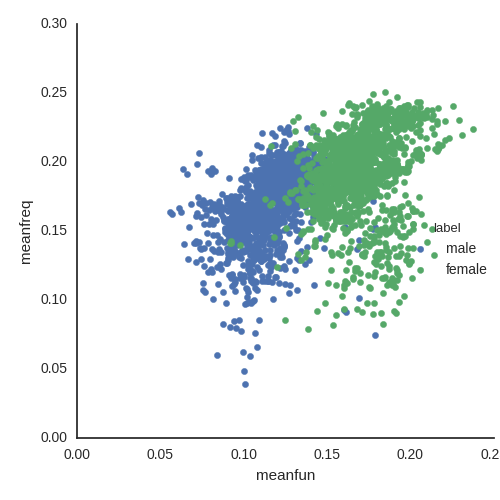

In [58]:
from IPython.display import Image
Image(filename='figure1.png')


In [13]:
#Boxplot
#you can visualise other features by substuting "meanfun"
sns.boxplot(x="label",y="meanfun",data=voice)
plt.show()


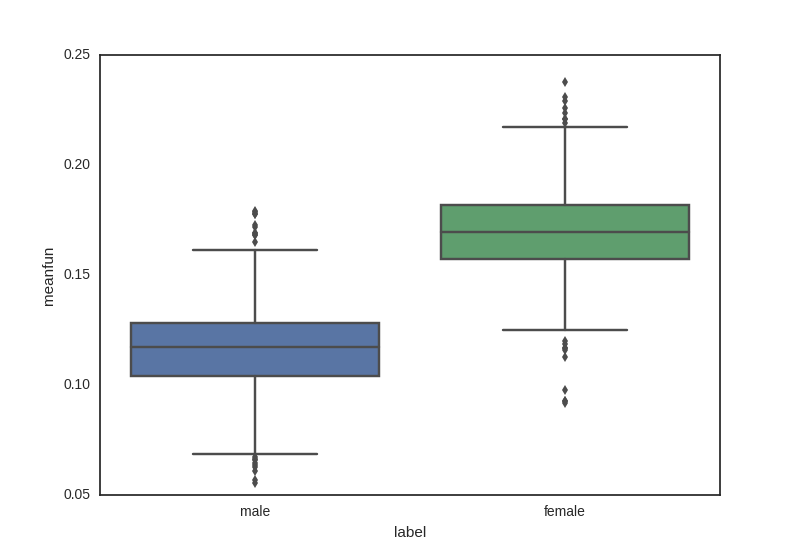

In [15]:
from IPython.display import Image
Image(filename='figure2.png')

In [16]:
#Distribution of male and female(every feature)
sns.FacetGrid(voice, hue="label", size=6) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.show()

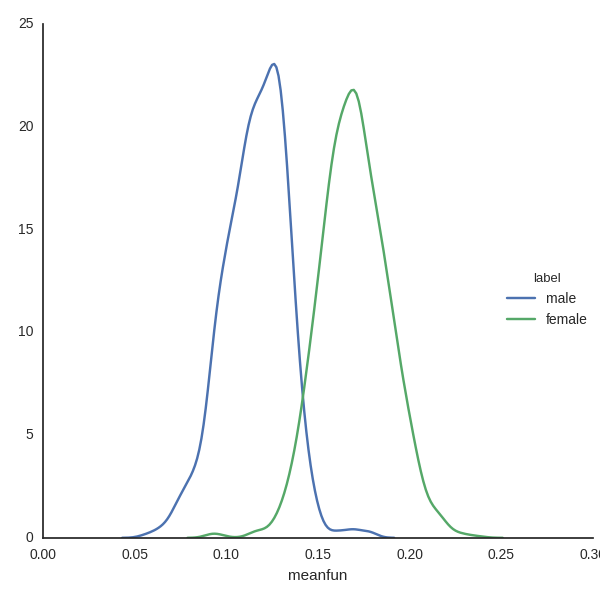

In [59]:
from IPython.display import Image
Image(filename='figure3.png')


In [20]:
#Radviz circle 
#Good to compare every feature
from pandas.tools.plotting import radviz
radviz(voice, "label")
plt.show()

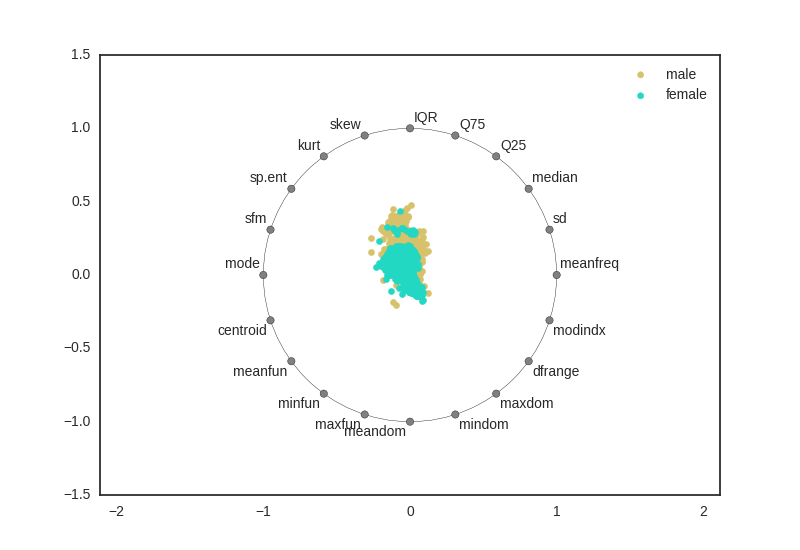

In [53]:
from IPython.display import Image
Image(filename='figure4.png')


In [62]:
voice["label"].replace(['male','female'], [1, 0], inplace = True)

In [56]:
from sklearn import ensemble
import numpy as np
gbc = ensemble.GradientBoostingClassifier()
y=voice.pop("label")
gbc.fit(voice,y)
feature_importance = gbc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A7')
plt.yticks(pos, np.asanyarray(voice.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig("be.png")

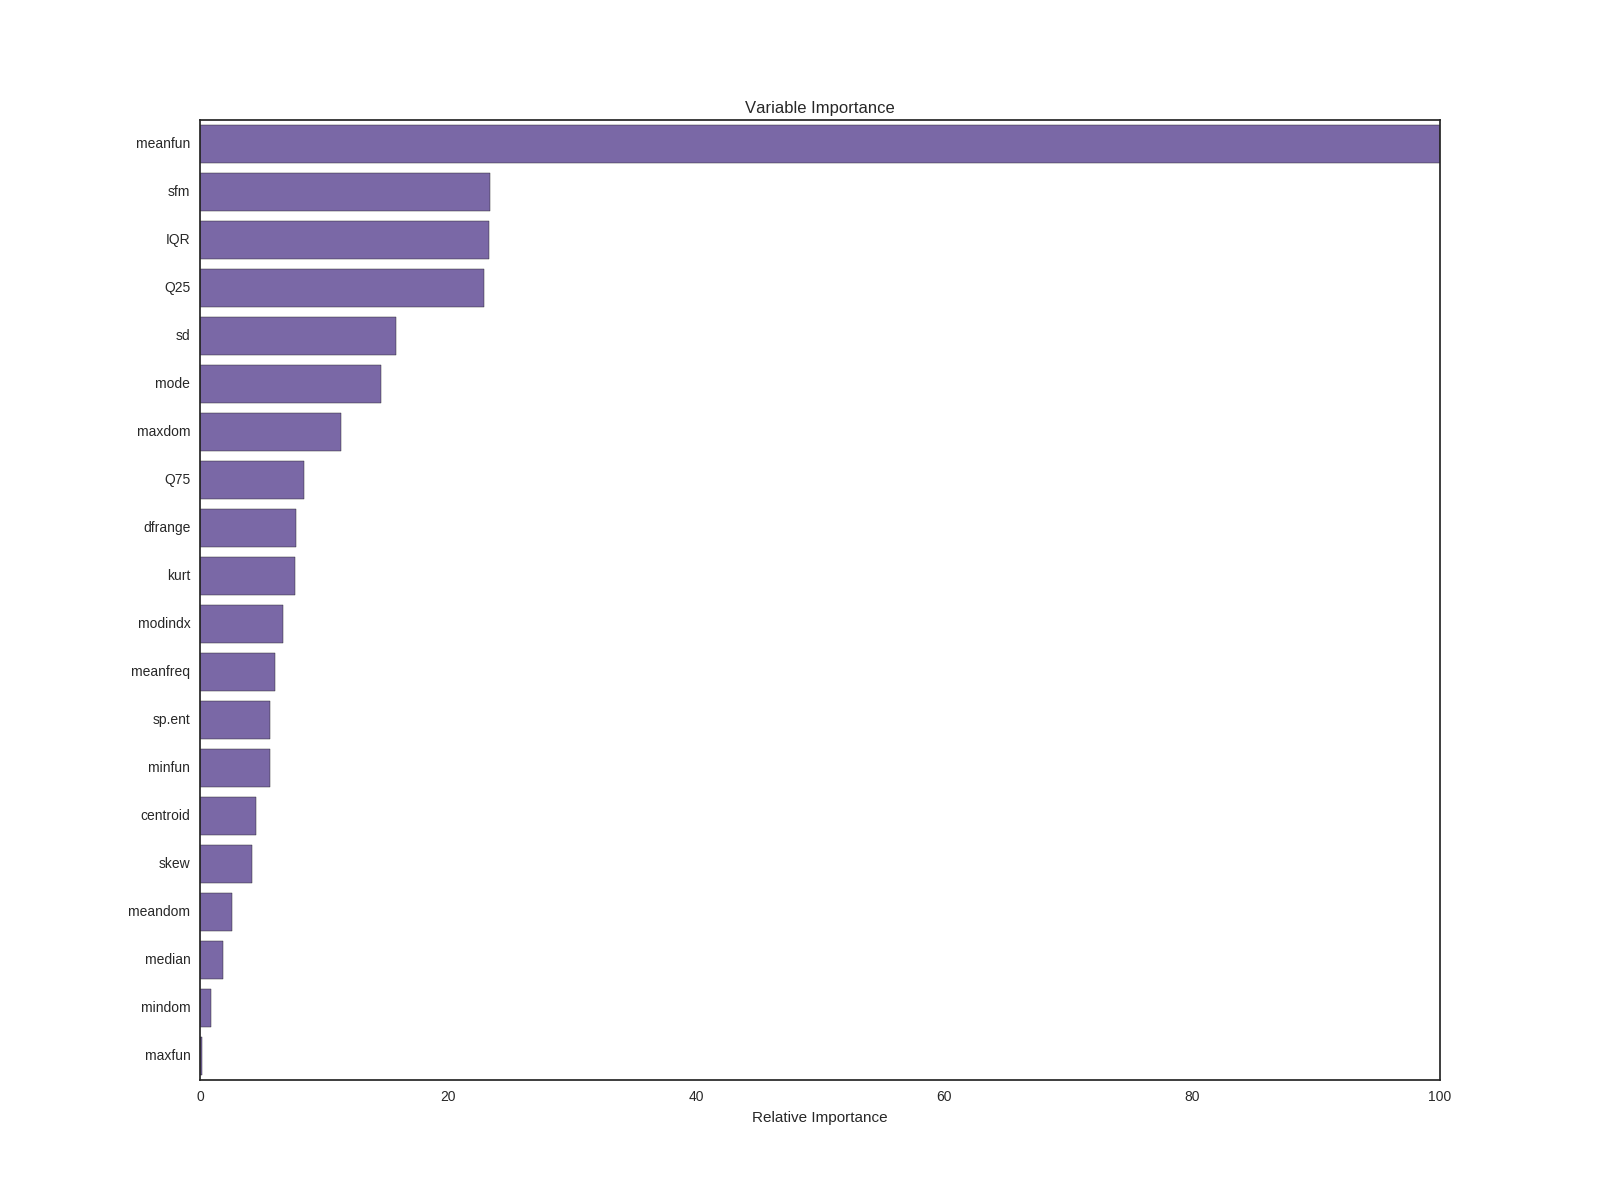

In [52]:
from IPython.display import Image
Image(filename='be.png')
